In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
 # creating Data:
 weight =0.5
 bias = 0.1
 start=0
 end=1
 step=0.02
 X = torch.arange(start,end,step=step).unsqueeze(dim=1)
 y = weight*X + bias

In [ ]:
# Splitting data with 80% training and 20% testing data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
# Visualizing train/test/prediction data
def plotprediction(training_data=X_train,training_label=y_train,
 test_data=X_test,test_label= y_test ,prediction= None):
  plt.scatter(training_data,training_label,c='b',label='Training data')
  plt.scatter(test_data,test_label,c='g',label='Testing data')
  if prediction is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label='Predictions')
  plt.legend()
  plt.title('train/test data')

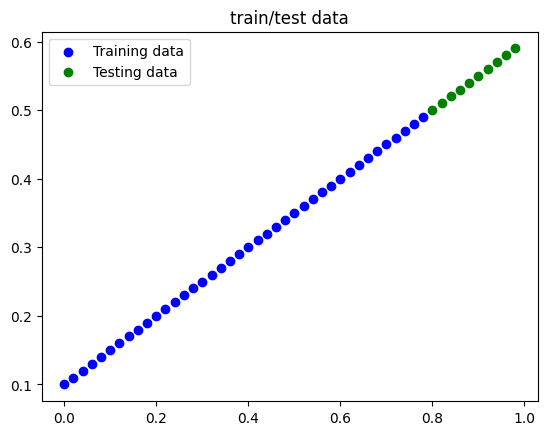

In [ ]:
plotprediction()

In [ ]:
# Create an one layer model

class mylinearreg(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
  def forward(self, x:torch.tensor)-> torch.tensor:
      return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(43)
model_0= mylinearreg()
model_0, model_0.state_dict()

(mylinearreg(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.0921]])),
              ('linear_layer.bias', tensor([-0.6070]))]))

In [ ]:
#creating Loss function and optimizer
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)


In [ ]:
#Training/Testing loop
torch.manual_seed(43)
epoch=100
Lossr=[] # these are for storing loss values evere 10 epoch, we use these values for visualizing.they are not needed for training process and can be removed as well as 3 line codes at the bottom of this cell
Loss_testr=[]
epochr=[]
for epoch in range(epoch):
  #Training loop:
  model_0.train()
  #forward method
  output=model_0(X_train)

  Loss=loss_fn(output,y_train) # first argument of this functio is real outpout and secod is target

  optimizer.zero_grad()

  Loss.backward()

  optimizer.step()

  #Testing Loop:
  model_0.eval()
  with torch.inference_mode():
    predictions=model_0(X_test)
  Loss_test=loss_fn(predictions,y_test)
  if epoch %10==0:
    Lossr.append(Loss.detach().numpy()) # these 3 line codes is used in other cell for visualizing data
    Loss_testr.append(Loss_test.detach().numpy())
    epochr.append(epoch)
    print(f"epoch={epoch}| training loss is {Loss}|test lost is {Loss_test}")



epoch=0| training loss is 0.9379222989082336|test lost is 1.2204830646514893
epoch=10| training loss is 0.8227123022079468|test lost is 1.0857731103897095
epoch=20| training loss is 0.7075024843215942|test lost is 0.9510631561279297
epoch=30| training loss is 0.5922925472259521|test lost is 0.8163533210754395
epoch=40| training loss is 0.4770825505256653|test lost is 0.6816433668136597
epoch=50| training loss is 0.36187252402305603|test lost is 0.5469332933425903
epoch=60| training loss is 0.24666254222393036|test lost is 0.41222327947616577
epoch=70| training loss is 0.1314525306224823|test lost is 0.2775132358074188
epoch=80| training loss is 0.06580860912799835|test lost is 0.18020620942115784
epoch=90| training loss is 0.05133397504687309|test lost is 0.13440918922424316


In [ ]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2676]])),
             ('linear_layer.bias', tensor([0.1925]))])

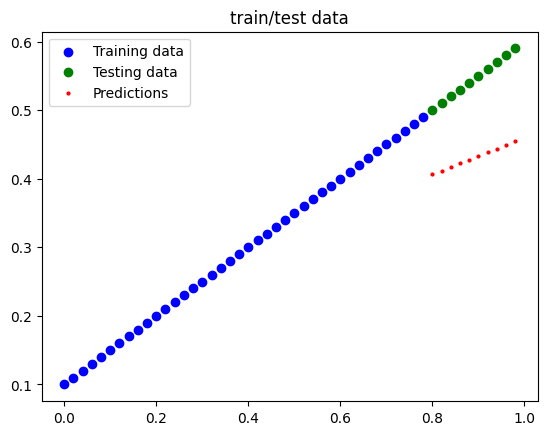

In [ ]:
plotprediction(prediction=predictions)

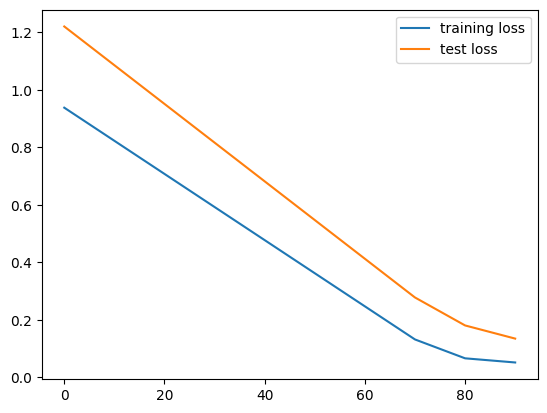

In [ ]:
import numpy as np
#plotting Loss curves
plt.plot(epochr,Lossr,label='training loss')
plt.plot(epochr,Loss_testr,label='test loss')
plt.legend()